In [13]:
import numpy as np
from scipy.signal import savgol_filter as sgf
from scipy.optimize import curve_fit as cf
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.stats import linregress
from matplotlib.colors import LogNorm

### Read Matlab Dat

Channels: 
1) LaCl3
2) CLYC
3) 
4)
5) CLYC (outside)
6)
7)
8) BC501 (outside)

In [14]:
def plotMatlabData(filename, channel=1):
    data = loadmat(filename,struct_as_record=False,simplify_cells=True)
    x = data['hgS_070000']['children'][channel]['children'][0]['properties']['XData']
    y = data['hgS_070000']['children'][channel]['children'][0]['properties']['YData']
    return x,y

In [15]:
def plot2DMatlabData(filename, channel=1):
    data = loadmat(filename,struct_as_record=False,simplify_cells=True)
    x = data['hgS_070000']['children'][channel]['children'][0]['properties']['XData']
    y = data['hgS_070000']['children'][channel]['children'][0]['properties']['YData']
    z = data['hgS_070000']['children'][channel]['children'][0]['properties']['CData']
    return x,y,z

In [16]:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2)) / sigma / np.sqrt(2*np.pi)

def mean(x,y):
    return sum(x*y)/sum(y)

def sig(x,y):
    return np.sqrt(sum(y * (x - mean(x,y))**2) / sum(y))

### Energy spectrum plot

(0.0, 300.0)

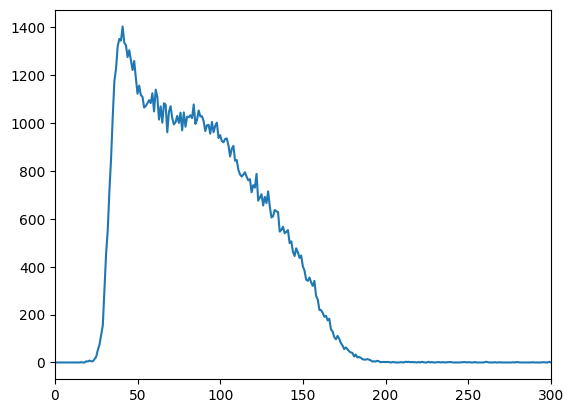

In [17]:
x,y = plotMatlabData('11-07-2024-lacl3\\143604-CH1-19088\\143604_Energy.fig',channel=8)
plt.plot(x,y)

plt.xlim(0,300)

### PSD data viz (matlab figure based)

In [18]:
# sum over 5 discharges

x,y,z0 = plot2DMatlabData('11-07-2024-lacl3\\143600-CH1-19530\\143600_PSD.fig',channel=8)
x,y,z2 = plot2DMatlabData('11-07-2024-lacl3\\143602-CH1-19347\\143602_PSD.fig',channel=8)
#x,y,z3 = plot2DMatlabData('11-07-2024_lacl3\\143603-CH1-19985\\143603_PSD.fig',channel=8)
#x,y,z4 = plot2DMatlabData('11-07-2024_lacl3\\143604-CH1-19088\\143604_PSD.fig',channel=8)
#x,y,z5 = plot2DMatlabData('11-07-2024_lacl3\\143605-CH1-18272\\143605_PSD.fig',channel=8)

z = np.zeros((len(x),len(y)))

for j in range(len(x)):
    for i in range(len(y)):
        if (z0[i,j]>=0): z[i,j]+=10**z0[i,j]
        if (z2[i,j]>=0): z[i,j]+=10**z2[i,j]
        #if (z3[i,j]>=0): z[i,j]+=10**z3[i,j]
        #if (z4[i,j]>=0): z[i,j]+=10**z4[i,j]
        #if (z5[i,j]>=0): z[i,j]+=10**z5[i,j]


FileNotFoundError: [Errno 2] No such file or directory: '11-07-2024_lacl3\\143600-CH1-19530\\143600_PSD.fig.mat'

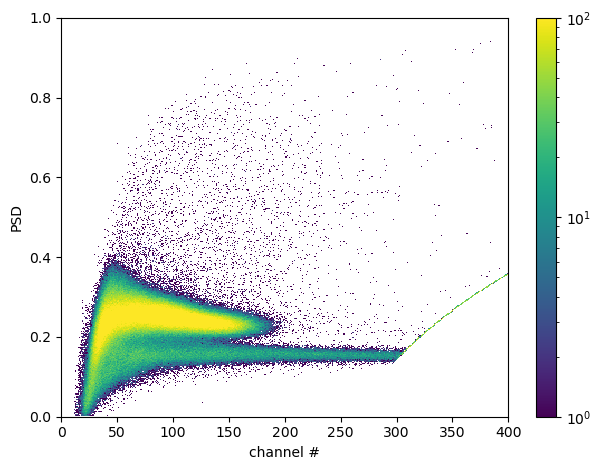

In [ ]:
plt.pcolormesh(x,y,z,norm=LogNorm(vmin=1,vmax=100))

plt.xlim(0,400)
plt.ylim(0,1)

plt.xlabel('channel #')
plt.ylabel('PSD')

plt.colorbar()

plt.tight_layout()